# Transitioning from WebbPSF to STPSF

To reflect its broader support for Roman as well as James Webb, WebbPSF functionality has now migrated to STPSF (Space Telescope PSF). STPSF functionality is currently the same as WebbPSF, only the name is different. 

For users who have not switched to using STPSF:
WebbPSF is now an alias of STPSF and is running code from the STPSF library. Therefore, the versioning of WebbPSF will not be parallel to the released versions of STPSF.  WebbPSF will automatically include the newest STPSF changes.

For users ready to switch to STPSF:
If you are ready to make the change to STPSF, this notebook will help you explore the best options in order to transition your WebbPSF scripts and codes into STPSF. Generally speaking there are two options:

- `import stpsf`. This is the preferred method.  In this case you will fully transition to the STPSF usage, thus, you need to replace all the WebbPSF calls to STPSF.

- `import stpsf as webbpsf`. This can be done at the beginning of your code and it will keep your code as-is, preserving WebbPSF syntax to function calls.  This is beneficial if you just want to do a quick change to your codebase.  However, a full rename (as outlined below), will lead to a more legible and healthy codebase.



Note that in both cases you'll be required to install STPSF, including downloading the STPSF data files and setting a STPSF_PATH environment variable. See instructions under [Requirements & Installation](https://stpsf.readthedocs.io/en/latest/installation.html#requirements-installation). 
WebbPSF is no longer a requirement and can be removed from your environment.  Any references to WebbPSF in your library via requirements.txt or pyproject.toml, should be replaced with STPSF.

<div class="alert alert-info">For STScI Users Only: 
    
Updates to Data Paths:
    
- Data previously located at: /grp/jwst/ote/webbpsf-data

- New data location: /grp/stpsf/stpsf-data
</div>


There are other changes to be aware if you are using WebbPSF as part of your code or repo and you are ready to transition  to STPSF.  

#### Updating CI/Code/Environment References:
- Update any references to `$WEBBPSF_PATH` with `$STPSF_PATH`

#### Extracted Information Location:
- Extracted information is now stored in: /stpsf-data


##### Updating Public Access Data References

Update references to public access data following these guidelines:
- Update minimal-webbpsf-data-LATEST.tar.gz to minimal-stpsf-data-LATEST.tar.gz
- Update webbpsf-data-LATEST.tar.gz to stpsf-data-LATEST.tar.gz
- Update minimum latest URL from: https://stsci.box.com/shared/static/0dt9z6b927iqgtify2a4cvls9hvapi6k.gz to: https://stsci.box.com/shared/static/3hzmbarac5yxjt6x7gn17vz02k7c8z1d.gz
- Update full latest URL from: https://stsci.box.com/shared/static/qxpiaxsjwo15ml6m4pkhtk36c9jgj70k.gz to: https://stsci.box.com/shared/static/kqfolg2bfzqc4mjkgmujo06d3iaymahv.gz

# import stpsf

In this case we import STPSF and replace all the calls to webbpsf with stpsf. 
<div class="alert alert-info"> **Tip:** you can use a the "find and replace" function from your code editor to speed up the process </div>

In [1]:
import stpsf

Remember to set your `STPSF_PATH` system variable  to the location of [stpsf-data-LATEST.tar.gz](stpsf-data-LATEST.tar.gz ). 

You can always check your STPSF data file location in the following way:
```
import os
os.environ["STPSF_PATH"]
```

We can proceed with our code using the STPSF syntax

In [4]:
nrc = stpsf.NIRCam()
nrc.filter='F200W'

nrc.detector = 'NRCB2'
nrc.detector_position = (1024,1024)
psf = nrc.calc_psf(fov_pixels=101)

Let's display the results

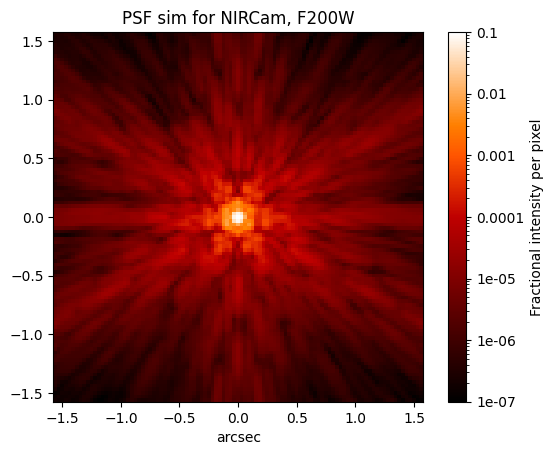

In [6]:
stpsf.display_psf(psf, ext=1)

We can do some wavefront trending for a given month

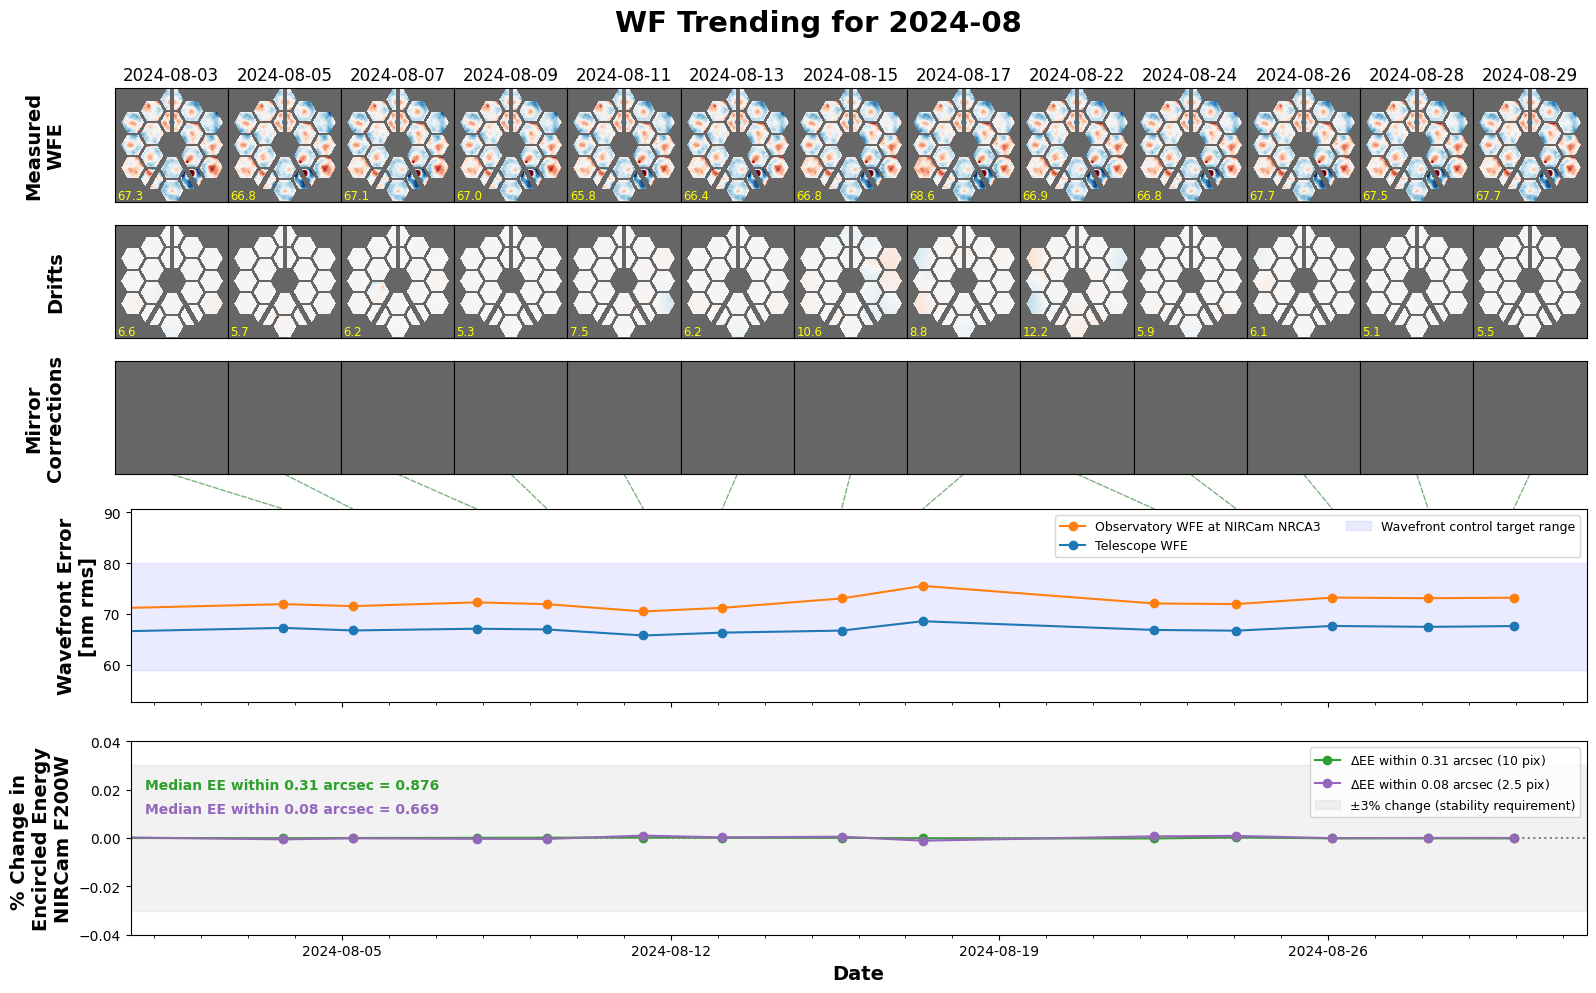

In [7]:
trend_table = stpsf.trending.monthly_trending_plot(2024, 8, verbose=False)

<a id="import_stpsf_as_webbpsf"></a> 
# import stpsf as webbpsf

In this case there are no changes to your existing WebbPSF code, except from setting WebbPSF as an alias for STPSF. 

In [1]:
import stpsf as webbpsf

Remember that in this case WebbPSF is an alias of STPSF so you still need to have your system variable pointing to the location of [stpsf-data-LATEST.tar.gz](stpsf-data-LATEST.tar.gz ). 

You can always check your STPSF data file location in the following way:
```
import os
os.environ["STPSF_PATH"]
```

Once we set our STPSF alias then we can proceed with our code using the WebbPSF syntax

In [10]:
nrc = webbpsf.NIRCam()
nrc.filter='F200W'

nrc.detector = 'NRCB2'
nrc.detector_position = (1024,1024)
psf = nrc.calc_psf(fov_pixels=101)

Let's display the results

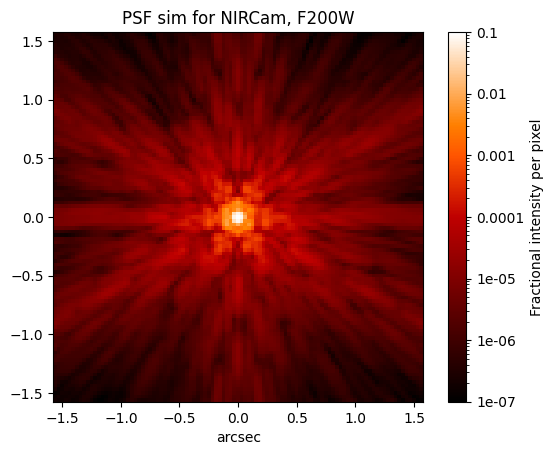

In [11]:
webbpsf.display_psf(psf, ext=1)

We can do some wavefront trending for a given month

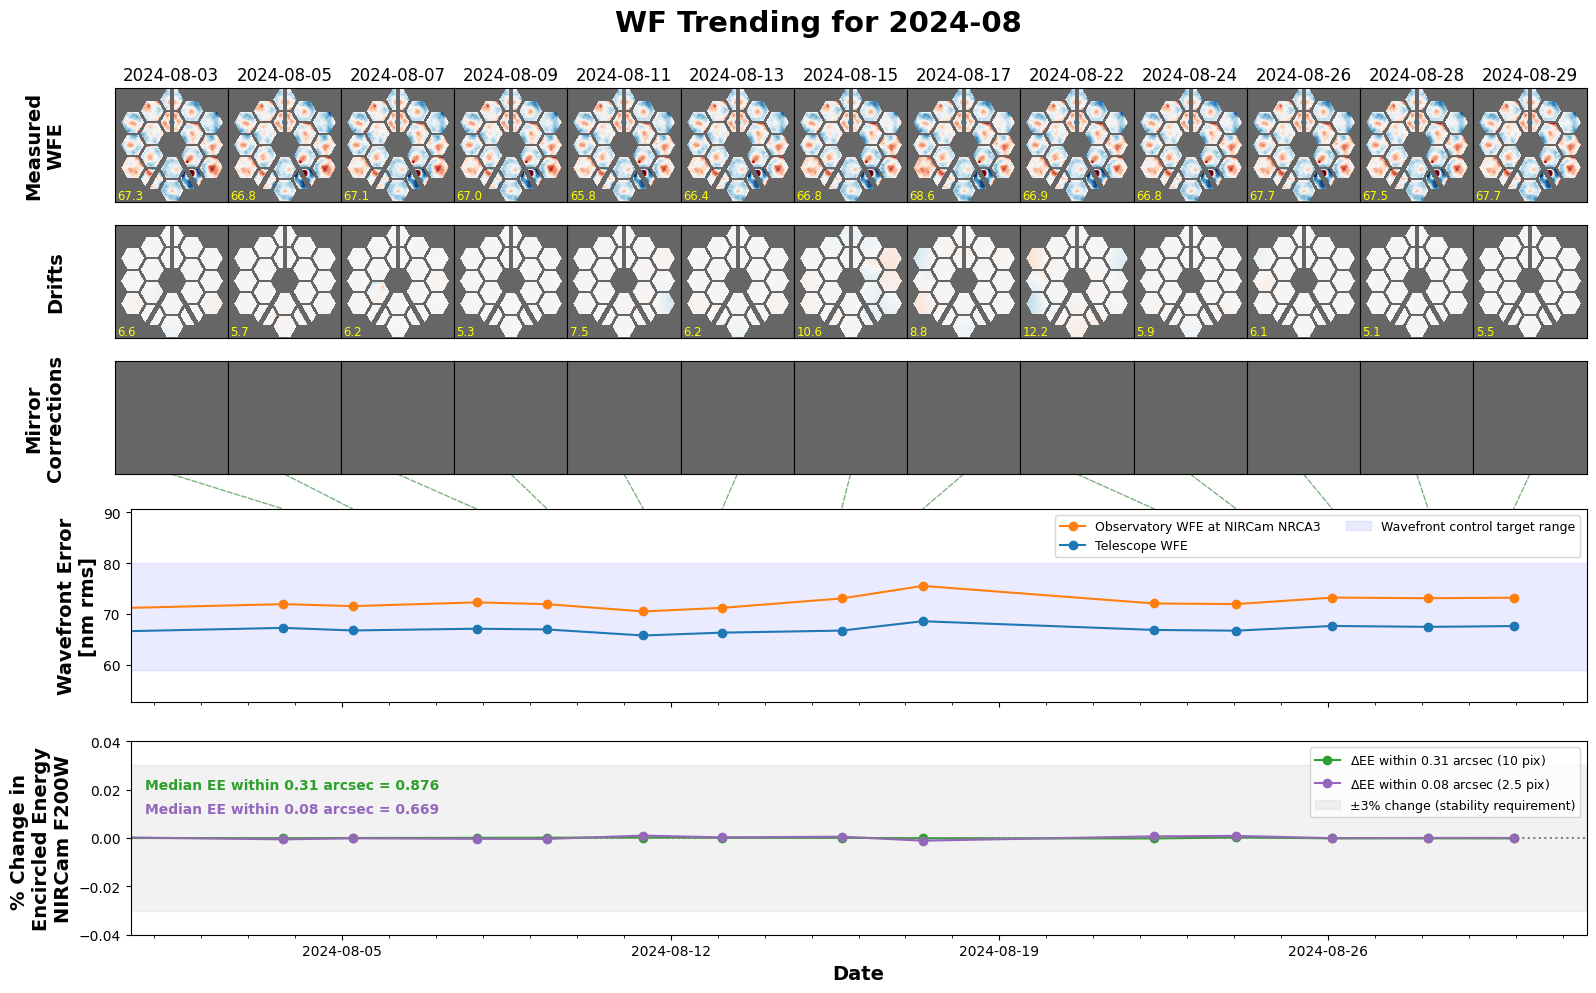

In [13]:
trend_table = webbpsf.trending.monthly_trending_plot(2024, 8, verbose=False)

In this notebook we described a couple of very simple examples on how to transition from WebbPSF to STPSF. We think that these simple options should work for the vast majority of users, however, don’t hesitate to contact us if you have any questions. 